# Coverage analysis

In [1]:
import networkx as nx
import matplotlib
from matplotlib import pyplot
from statistics import median

## Load graph
Parsing GFA file manually, since GfaPy takes a strangely long amount of time reading through it.

In [2]:
# Loads the old graph
#FILENAME = "/home/marcus/PevznerLabBigData/old_graph/sheep_graph_noseq.gfa"

# Loads the new graph
FILENAME = "/home/marcus/PevznerLabBigData/20201014_graph/noseq.gfa"

# We ignore directionality for right now
graph = nx.Graph()

with open(FILENAME, "r") as gfafile:
    for line in gfafile:
        if line[0] == "S":
            parts = line.strip().split("\t")
            node_name = parts[1]
            node_len = None
            node_cov = None
            extra_data = parts[3:]
            for tag in extra_data:
                if tag.startswith("LN:i:"):
                    if node_len is None:
                        node_len = int(tag[5:])
                    else:
                        raise ValueError("Duplicate length for node {}".format(node_name))
                elif tag.startswith("dp:i:"):
                    if node_cov is None:
                        node_cov = int(tag[5:])
                    else:
                        raise ValueError("Duplicate coverage for node {}".format(node_name))
            graph.add_node(node_name, length=node_len, cov=node_cov)
        elif line[0] == "L":
            parts = line.strip().split("\t")
            src = parts[1]
            snk = parts[3]
            # Ignore directionality for just right now; this means that some links will be "repeated" (for
            # the new graph this means that the NX representation has 484 less links)
            graph.add_edge(src, snk)

print("Graph contains {} edges (represented as GFA segments).".format(graph.number_of_nodes()))
print("Graph contains {} links between edges (ignoring directionality for now).".format(graph.number_of_edges()))
print("Graph contains {} connected components.".format(nx.number_connected_components(graph)))

Graph contains 36260 edges (represented as GFA segments).
Graph contains 40545 links between edges (ignoring directionality for now).
Graph contains 8655 connected components.


## Compute coverage statstics for each component

In [3]:
# Sort components by number of edges.
node2len = nx.get_node_attributes(graph, "length")
node2cov = nx.get_node_attributes(graph, "cov")
sorted_components = sorted(
    nx.connected_components(graph),
    key=len,
    reverse=True
)

node2cmp = {}
cmp2totalLen = {}
cmp2meanCov = {}
cmp2medianCov = {}
cmp2cov = {}
for i, cmp in enumerate(sorted_components):
    for node in cmp:
        node2cmp[node] = i + 1
    cmp2cov[i] = [node2cov[node] for node in cmp]
    cmp2totalLen[i] = sum([node2len[node] for node in cmp])
    cmp2meanCov[i] = sum(cmp2cov[i]) / len(cmp)
    cmp2medianCov[i] = median(cmp2cov[i])
    # https://stackoverflow.com/a/10742904/10730311
    cmpNum = "{:,}".format(i + 1).ljust(6, " ")
    print("Component #{}: {} edges, total length {:,}, mean coverage {:.2f}x, median coverage {:.2f}x, has edge {}".format(
        # https://stackoverflow.com/a/59841/10730311
        cmpNum, len(cmp), cmp2totalLen[i], cmp2meanCov[i], cmp2medianCov[i], next(iter(cmp))
    ))

Component #1     : 21062 edges, total length 671,531,395, mean coverage 197.31x, median coverage 19.00x, has edge 353
Component #2     : 823 edges, total length 7,117,879, mean coverage 23.15x, median coverage 19.00x, has edge 5540
Component #3     : 422 edges, total length 6,960,522, mean coverage 12.80x, median coverage 11.00x, has edge 11208
Component #4     : 383 edges, total length 5,802,376, mean coverage 46.33x, median coverage 40.00x, has edge 32467
Component #5     : 304 edges, total length 2,657,523, mean coverage 300.43x, median coverage 272.50x, has edge 18399
Component #6     : 295 edges, total length 2,434,666, mean coverage 17.67x, median coverage 17.00x, has edge 33365
Component #7     : 205 edges, total length 1,761,875, mean coverage 35.33x, median coverage 32.00x, has edge 10128
Component #8     : 152 edges, total length 14,109,441, mean coverage 24.25x, median coverage 16.00x, has edge 21057
Component #9     : 143 edges, total length 3,705,162, mean coverage 8.86x, 

Component #2,471 : 1 edges, total length 607, mean coverage 33.00x, median coverage 33.00x, has edge 11064
Component #2,472 : 1 edges, total length 8,060, mean coverage 11.00x, median coverage 11.00x, has edge 11065
Component #2,473 : 1 edges, total length 4,147, mean coverage 7.00x, median coverage 7.00x, has edge 11068
Component #2,474 : 1 edges, total length 1,354, mean coverage 7.00x, median coverage 7.00x, has edge 11072
Component #2,475 : 1 edges, total length 4,325, mean coverage 4.00x, median coverage 4.00x, has edge 11092
Component #2,476 : 1 edges, total length 3,692, mean coverage 3.00x, median coverage 3.00x, has edge 11093
Component #2,477 : 1 edges, total length 23,117, mean coverage 4.00x, median coverage 4.00x, has edge 11107
Component #2,478 : 1 edges, total length 24,393, mean coverage 4.00x, median coverage 4.00x, has edge 11110
Component #2,479 : 1 edges, total length 53,672, mean coverage 3.00x, median coverage 3.00x, has edge 11119
Component #2,480 : 1 edges, tota

Component #4,766 : 1 edges, total length 4,215, mean coverage 7.00x, median coverage 7.00x, has edge 21421
Component #4,767 : 1 edges, total length 29,685, mean coverage 3.00x, median coverage 3.00x, has edge 21439
Component #4,768 : 1 edges, total length 37,210, mean coverage 3.00x, median coverage 3.00x, has edge 21440
Component #4,769 : 1 edges, total length 141,814, mean coverage 3.00x, median coverage 3.00x, has edge 21441
Component #4,770 : 1 edges, total length 25,115, mean coverage 5.00x, median coverage 5.00x, has edge 21443
Component #4,771 : 1 edges, total length 46,156, mean coverage 3.00x, median coverage 3.00x, has edge 21445
Component #4,772 : 1 edges, total length 9,466, mean coverage 3.00x, median coverage 3.00x, has edge 21449
Component #4,773 : 1 edges, total length 32,430, mean coverage 3.00x, median coverage 3.00x, has edge 21450
Component #4,774 : 1 edges, total length 3,264, mean coverage 8.00x, median coverage 8.00x, has edge 21451
Component #4,775 : 1 edges, to

Component #6,668 : 1 edges, total length 12,537, mean coverage 3.00x, median coverage 3.00x, has edge 28422
Component #6,669 : 1 edges, total length 1,334, mean coverage 7.00x, median coverage 7.00x, has edge 28423
Component #6,670 : 1 edges, total length 147,593, mean coverage 6.00x, median coverage 6.00x, has edge 28424
Component #6,671 : 1 edges, total length 296,552, mean coverage 4.00x, median coverage 4.00x, has edge 28426
Component #6,672 : 1 edges, total length 70,943, mean coverage 3.00x, median coverage 3.00x, has edge 28427
Component #6,673 : 1 edges, total length 47,028, mean coverage 3.00x, median coverage 3.00x, has edge 28428
Component #6,674 : 1 edges, total length 6,004, mean coverage 4.00x, median coverage 4.00x, has edge 28432
Component #6,675 : 1 edges, total length 64,260, mean coverage 3.00x, median coverage 3.00x, has edge 28437
Component #6,676 : 1 edges, total length 89,258, mean coverage 5.00x, median coverage 5.00x, has edge 28438
Component #6,677 : 1 edges, 

Component #8,624 : 1 edges, total length 42,564, mean coverage 8.00x, median coverage 8.00x, has edge 36217
Component #8,625 : 1 edges, total length 169,670, mean coverage 21.00x, median coverage 21.00x, has edge 36221
Component #8,626 : 1 edges, total length 38,190, mean coverage 3.00x, median coverage 3.00x, has edge 36223
Component #8,627 : 1 edges, total length 36,812, mean coverage 5.00x, median coverage 5.00x, has edge 36224
Component #8,628 : 1 edges, total length 47,452, mean coverage 7.00x, median coverage 7.00x, has edge 36225
Component #8,629 : 1 edges, total length 55,614, mean coverage 11.00x, median coverage 11.00x, has edge 36226
Component #8,630 : 1 edges, total length 52,587, mean coverage 6.00x, median coverage 6.00x, has edge 36228
Component #8,631 : 1 edges, total length 58,376, mean coverage 4.00x, median coverage 4.00x, has edge 36230
Component #8,632 : 1 edges, total length 40,129, mean coverage 4.00x, median coverage 4.00x, has edge 36233
Component #8,633 : 1 ed

## Compute entire-graph coverage statistics

In [4]:
covs = node2cov.values()
print("Minimum coverage: {}".format(min(covs)))
print("Maximum coverage: {}\n".format(max(covs)))
print("Average coverage: {:.2f}".format(sum(covs) / len(covs)))
print("Median coverage: {}\n".format(median(covs)))

print("===MAX COVERAGE EDGES===")
max_cov_nodes = sorted(node2cov.keys(), key=lambda node: node2cov[node], reverse=True)
for i in range(10):
    node = max_cov_nodes[i]
    print(
        "{}. Edge {} has a coverage of {}. {} neighbors.".format(
            i + 1, node, node2cov[node], len(graph.adj[node])
        )
    )
    
# (Allowing self edges, tho)
print("\n===MAX COVERAGE EDGES (just isolated ones)===")
max_cov_isolated_nodes = list(
    filter(
        lambda node: len(set(graph.adj[node]) - set([node])) == 0,
        max_cov_nodes
    )
)
for i in range(10):
    node = max_cov_isolated_nodes[i]
    print("{}. Edge {} has a coverage of {}.".format(i + 1, node, node2cov[node]))

Minimum coverage: 0
Maximum coverage: 220608

Average coverage: 139.06
Median coverage: 12.0

===MAX COVERAGE EDGES===
1. Edge 3782 has a coverage of 220608. 5 neighbors.
2. Edge 3788 has a coverage of 200830. 7 neighbors.
3. Edge 1016 has a coverage of 184382. 3 neighbors.
4. Edge 3784 has a coverage of 174847. 4 neighbors.
5. Edge 1012 has a coverage of 139715. 7 neighbors.
6. Edge 3791 has a coverage of 105920. 4 neighbors.
7. Edge 1019 has a coverage of 81073. 3 neighbors.
8. Edge 2 has a coverage of 70236. 5 neighbors.
9. Edge 999 has a coverage of 69045. 7 neighbors.
10. Edge 1014 has a coverage of 51202. 4 neighbors.

===MAX COVERAGE EDGES (just isolated ones)===
1. Edge 1010 has a coverage of 25421.
2. Edge 3172 has a coverage of 17083.
3. Edge 12782 has a coverage of 9204.
4. Edge 836 has a coverage of 8864.
5. Edge 842 has a coverage of 8831.
6. Edge 31439 has a coverage of 8761.
7. Edge 3175 has a coverage of 8660.
8. Edge 831 has a coverage of 8646.
9. Edge 833 has a covera

## Find long (>= 1 million bp) and high-coverage (> 500x) edges in simple areas of the graph

(Good candidates for constructing mutation spectra.)

In [5]:
good_nodes = filter(lambda node: node2len[node] > 1000000, max_cov_nodes)
for i, node in enumerate(good_nodes):
    if node2cov[node] >= 100:
        cmp = node2cmp[node]
        neighbors = set(graph.adj[node]) - set([node])
        print(
            "{}. Edge {} has a coverage of {:,} and length of {:,}. {} neighbors, ignoring self-edges. In component {}.".format(
                i + 1, node, node2cov[node], node2len[node], len(neighbors), cmp
            )
        )
    else:
        break

1. Edge 1483 has a coverage of 1,221 and length of 1,013,247. 3 neighbors, ignoring self-edges. In component 1.
2. Edge 7998 has a coverage of 853 and length of 1,634,900. 0 neighbors, ignoring self-edges. In component 1822.
3. Edge 166 has a coverage of 557 and length of 1,302,342. 0 neighbors, ignoring self-edges. In component 512.
4. Edge 6018 has a coverage of 538 and length of 2,232,606. 3 neighbors, ignoring self-edges. In component 150.
5. Edge 4706 has a coverage of 434 and length of 1,020,246. 4 neighbors, ignoring self-edges. In component 1.
6. Edge 3233 has a coverage of 430 and length of 1,036,175. 3 neighbors, ignoring self-edges. In component 1.
7. Edge 2069 has a coverage of 248 and length of 2,778,833. 0 neighbors, ignoring self-edges. In component 843.
8. Edge 1866 has a coverage of 245 and length of 1,523,208. 3 neighbors, ignoring self-edges. In component 1.
9. Edge 25824 has a coverage of 196 and length of 1,197,225. 3 neighbors, ignoring self-edges. In component 1.

## Visualize histogram of average coverage by component

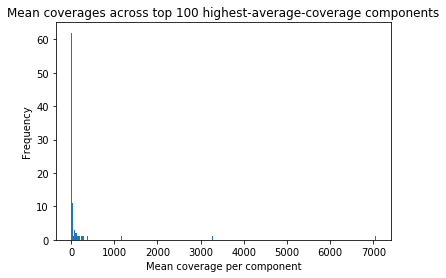

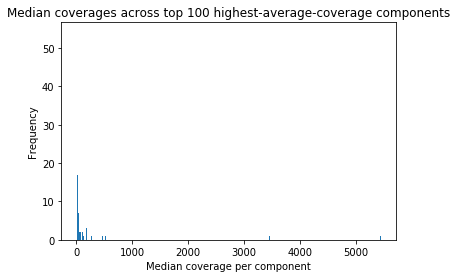

In [6]:
%matplotlib inline

pyplot.hist(x=[cmp2meanCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Mean coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Mean coverages across top 100 highest-average-coverage components")
pyplot.show()

pyplot.hist(x=[cmp2medianCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Median coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Median coverages across top 100 highest-average-coverage components")
pyplot.show()

## Visualize coverage histograms for the top $N$ components by mean coverage
Adapted from [this article](https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas).

In [6]:
%matplotlib inline
import math

N = 72

for i in range(N):
    noun = "edge" if len(cmp2cov[i]) == 1 else "edges"
    title = "Coverages: Component #{}\n{:,} {}; total length {:,}; mean coverage {:.2f}x".format(
        i + 1, len(cmp2cov[i]), noun, cmp2totalLen[i], cmp2meanCov[i]
    )
    pyplot.hist(x=cmp2cov[i], bins="auto")
        
    pyplot.xlabel("Coverage")
    pyplot.ylabel("Frequency")
    pyplot.title(title)
    pyplot.show()

KeyboardInterrupt: 

## How many of the top $N$ components contain just 1 edge?

In [7]:
num_1_edge_cmps = 0
for i in range(N):
    if len(cmp2cov[i]) == 1:
        num_1_edge_cmps += 1
print("{} of the top {} components have just 1 edge.".format(num_1_edge_cmps, N))

NameError: name 'N' is not defined

## For all components, plot number of edges vs. mean coverage

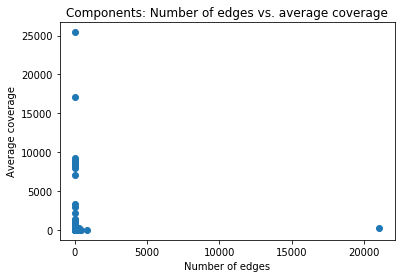

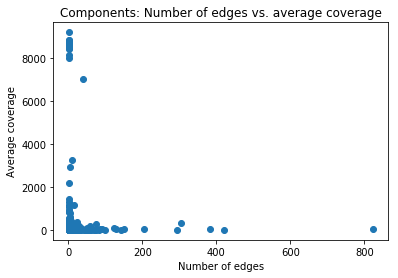

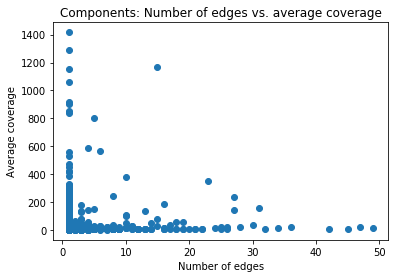

In [8]:
for cutoffs in [ [float("inf"), float("inf")], [1000, 10000], [50, 2000] ]:
    num_edges = []
    mean_cov = []
    for i, cmp in enumerate(sorted_components):
        ne = len(cmp)
        mc = cmp2meanCov[i]
        if ne < cutoffs[0] and mc < cutoffs[1]:
            num_edges.append(ne)
            mean_cov.append(mc)

    pyplot.scatter(x=num_edges, y=mean_cov)
    pyplot.title("Components: Number of edges vs. average coverage")
    pyplot.xlabel("Number of edges")
    pyplot.ylabel("Average coverage")
    pyplot.show()

## Visualize pileups

### 1. Visualizing "disagreement frequency"

For each edge sequence, find the number of matches (`.` or `,` characters) and return

\begin{equation}
\frac{1 - \text{Number of matching reads}}{\text{Number of aligned reads}}
\end{equation}

There may be some noise here due to the reuse of ASCII characters for base qualities—for a publication this should be redone with a dedicated pileup format parser.

In [ ]:
# for e in ("1010", "3172", "12782", "836", "842", "31439", "3175", "831", "833", "12783"):
#     with open("/home/marcus/PevznerLabBigData/20201014_graph/selected_pileup.txt", "r") as pf:
#         mutations_for_edge = []
#         pos = []
#         edge_header = "edge_{}_".format(e)
#         for line in pf:
#             if line.startswith(edge_header):
#                 split = line.split("\t")
#                 num_matches = split[4].count(".") + split[4].count(",")
#                 mutations_for_edge.append(1 - (num_matches / int(split[3])))
#                 pos.append(int(split[1]))

#     pyplot.scatter(x=pos, y=mutations_for_edge)
#     pyplot.title("Edge {}: Disagreement 'frequency'".format(e))
#     pyplot.xlabel("Sequence position")
#     pyplot.ylabel("Mutation frequency")
#     pyplot.ylim(bottom=0)
#     pyplot.show()

### 2. Visualizing raw number of discordant aligned reads

For each edge sequence, find the number of matches (`.` or `,` characters) and return

\begin{equation}
\text{Number of aligned reads} - \text{Number of matching reads}
\end{equation}

Same noise thing with ASCII characters applies.

In [10]:
from collections import defaultdict
edge2mutations = defaultdict(list)
edge2pos = defaultdict(list)
with open("/home/marcus/PevznerLabBigData/20201014_graph/5xdata-pileup.txt", "r") as pf:
    for line in pf:
        split = line.split("\t")
        lineheader = split[0]
        edgenum = lineheader.split("_")[1]
        num_matches = split[4].count(".") + split[4].count(",")
        edge2mutations[edgenum].append(int(split[3]) - num_matches)
        edge2pos[edgenum].append(int(split[1]))
        
# Following this, on the cluster I converted edge2mutations and edge2pos to json files using
# the https://stackoverflow.com/a/7100202/10730311 approach.

In [11]:
# import json
# with open("/home/marcus/PevznerLabBigData/20201014_graph/e2m.json", "r") as mf:
#     edge2mutations = json.load(mf)
# with open("/home/marcus/PevznerLabBigData/20201014_graph/e2p.json", "r") as pf:
#     edge2pos = json.load(pf)

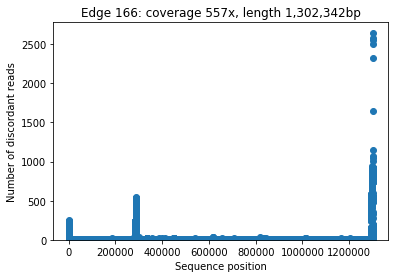

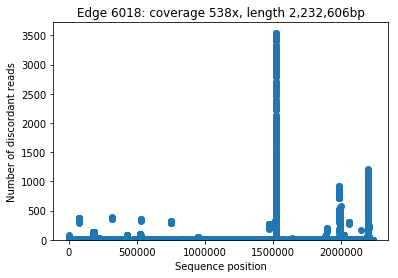

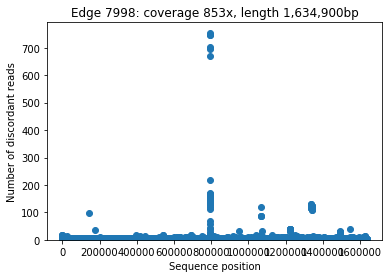

In [12]:
for e in edge2mutations.keys():
    pyplot.scatter(x=edge2pos[e], y=edge2mutations[e])
    pyplot.title("Edge {}: coverage {:,}x, length {:,}bp".format(e, node2cov[e], node2len[e]))
    pyplot.xlabel("Sequence position")
    pyplot.ylabel("Number of discordant reads")
    pyplot.ylim(bottom=0)
    pyplot.show()

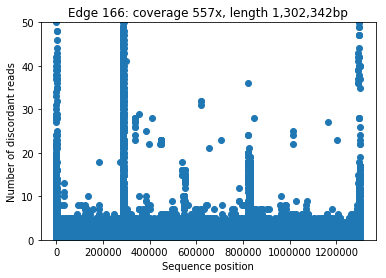

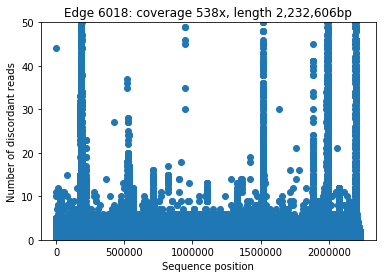

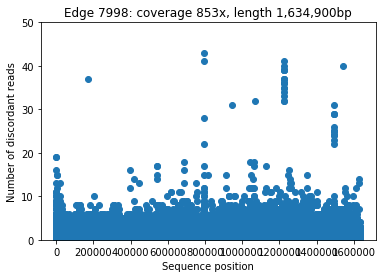

In [13]:
# Spectra but zoomed in to [0, 50]
for e in edge2mutations.keys():
    pyplot.scatter(x=edge2pos[e], y=edge2mutations[e])
    pyplot.title("Edge {}: coverage {:,}x, length {:,}bp".format(e, node2cov[e], node2len[e]))
    pyplot.xlabel("Sequence position")
    pyplot.ylabel("Number of discordant reads")
    pyplot.ylim(bottom=0, top=50)
    pyplot.show()

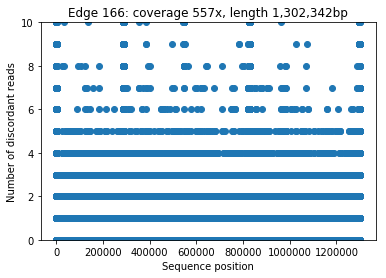

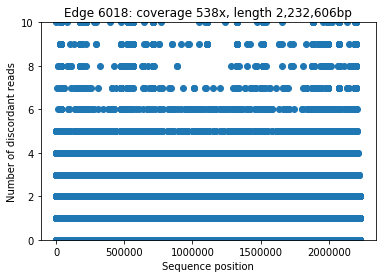

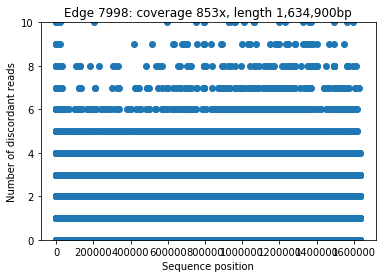

In [9]:
# Spectra but zoomed in to [0, 10]
for e in edge2mutations.keys():
    pyplot.scatter(x=edge2pos[e], y=edge2mutations[e])
    pyplot.title("Edge {}: coverage {:,}x, length {:,}bp".format(e, node2cov[e], node2len[e]))
    pyplot.xlabel("Sequence position")
    pyplot.ylabel("Number of discordant reads")
    pyplot.ylim(bottom=0, top=10)
    pyplot.show()

## Go through predicted genes and compute mutation frequencies at 1st, 2nd, 3rd positions

In [14]:
from collections import defaultdict

In [15]:
# Looks like {7998: {1: 1, 2: 0.75, 3: 0.5, 4: 1, ...}}

# This uses "mutation rate" at each position, so min is 0 and max is 1.
edge2pos2mutfreq = defaultdict(dict)
with open("/home/marcus/PevznerLabBigData/20201014_graph/5xdata-pileup.txt", "r") as pf:
    for line in pf:
        split = line.split("\t")
        lineheader = split[0]
        edgenum = lineheader.split("_")[1]
        num_matches = split[4].count(".") + split[4].count(",")
        
        # use 1-indexed coordinates, since MetaGeneMark does in its output (as far as I can tell).
        # Fortunately pileup also uses 1-indexed coordinates.
        pos = int(split[1])
        mutation_freq = 1 - (num_matches / int(split[3]))
        edge2pos2mutfreq[edgenum][pos] = mutation_freq

In [16]:
# # Similar to above, but uses just number of discordant reads.
# edge2pos2mutfreq = defaultdict(dict)
# with open("/home/marcus/PevznerLabBigData/20201014_graph/scf-pileup.txt", "r") as pf:
#     for line in pf:
#         split = line.split("\t")
#         lineheader = split[0]
#         edgenum = lineheader.split("_")[1]
#         num_matches = split[4].count(".") + split[4].count(",")
        
#         # use 1-indexed coordinates, since MetaGeneMark does in its output (as far as I can tell).
#         # Fortunately pileup also uses 1-indexed coordinates.
#         pos = int(split[1])
#         mutation_freq = int(split[3]) - num_matches
#         edge2pos2mutfreq[edgenum][pos] = mutation_freq

Average of average mutation rates for 221 genes in edge 7998: 0.00028466361625390906 | 0.0002787036477954177 | 0.0002842346538411656
Median of median mutation rates for 221 genes in edge 7998: 0.0 | 0.0 | 0.0


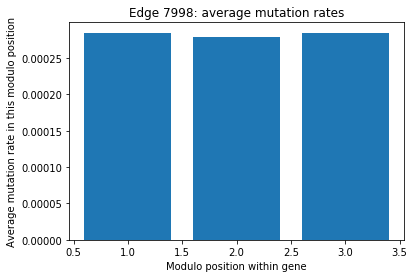

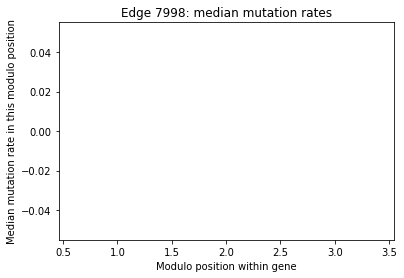

Average of average mutation rates for 192 genes in edge 166: 0.001147424427106537 | 0.0004015667405645662 | 0.0005170695893079061
Median of median mutation rates for 192 genes in edge 166: 0.0 | 0.0 | 0.0


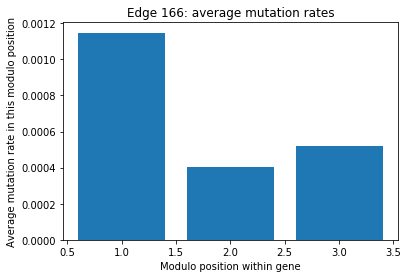

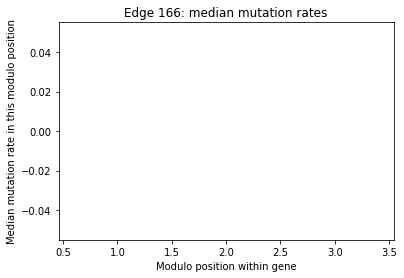

Average of average mutation rates for 294 genes in edge 6018: 0.00035317981006250526 | 0.0002984423151131897 | 0.0003010691654479952
Median of median mutation rates for 294 genes in edge 6018: 0.0 | 0.0 | 0.0


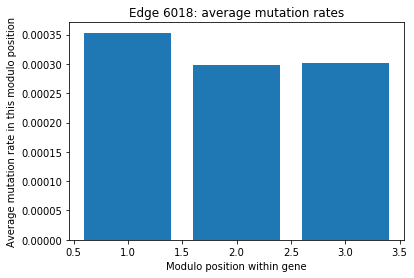

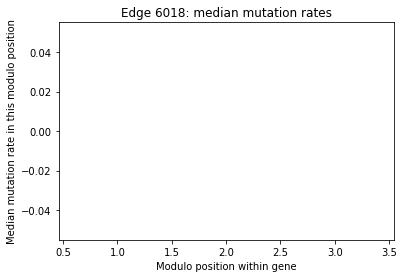

In [17]:
import pandas as pd
from statistics import mean, median

for edge in ["7998", "166", "6018"]:
    mgm = pd.read_csv(
        "/home/marcus/PevznerLabBigData/20201014_graph/{}_mgm_genes.txt".format(edge),
        sep="\s+", skiprows=[1], index_col=0, header=0, names=["Strand", "LeftEnd", "RightEnd", "Length", "Class"]
    )
    seq_avg_mut_rates = []
    seq_med_mut_rates = []
    for gene in mgm.itertuples():
        # only consider genes with >= 500 putative amino acids
        if gene.Length < 1500:
            # print("Gene {} has len {}, less than 300.".format(gene.Index, gene.Length))
            continue
        # Total mutation rates for each of the 0th, 1st, 2nd positions in the gene regions
        # (repeating, so it goes 0, 1, 2, 0, 1, 2, ...)
        zero_mut_rates = []
        one_mut_rates = []
        two_mut_rates = []
        
        try:
            start = int(gene.LeftEnd)
        except ValueError:
            # Account for the "<2" left end coordinate in one of the genes predicted
            start = int(gene.LeftEnd[1:])
        end = int(gene.RightEnd)
        
        i = 0
        for pos in range(start, end + 1):
            if i == 0:
                zero_mut_rates.append(edge2pos2mutfreq[edge][pos])
                i = 1
            elif i == 1:
                one_mut_rates.append(edge2pos2mutfreq[edge][pos])
                i = 2
            elif i == 2:
                two_mut_rates.append(edge2pos2mutfreq[edge][pos])
                i = 0
            else:
                raise ValueError("Marcus forgot how modulos work, go yell at him pls")
                
        if i != 0:
            raise ValueError("Gene length not divisible by 3.")

        avg_mut_rates = [mean(zero_mut_rates), mean(one_mut_rates), mean(two_mut_rates)]
        med_mut_rates = [median(zero_mut_rates), median(one_mut_rates), median(two_mut_rates)]
        seq_avg_mut_rates.append(avg_mut_rates)
        seq_med_mut_rates.append(med_mut_rates)
        # NOTE: this currently breaks median. TODO, compute average/median directly on mut freqs
        # without avging/medianing first?
        
        #print("0s:", sorted(zero_mut_rates))
        # print("Edge {}, gene {}: {} | {} | {}".format(edge, gene.Index, *mut_rates))
        
    num_genes = len(seq_avg_mut_rates)
    avgs = [
        mean(mr[0] for mr in seq_avg_mut_rates),
        mean(mr[1] for mr in seq_avg_mut_rates),
        mean(mr[2] for mr in seq_avg_mut_rates)
    ]
    meds = [
        median(mr[0] for mr in seq_med_mut_rates),
        median(mr[1] for mr in seq_med_mut_rates),
        median(mr[2] for mr in seq_med_mut_rates)
    ]
    print("Average of average mutation rates for {} genes in edge {}: {} | {} | {}".format(
        num_genes, edge, *avgs
    ))
    print("Median of median mutation rates for {} genes in edge {}: {} | {} | {}".format(
        num_genes, edge, *meds
    ))
    pyplot.bar(x=[1, 2, 3], height=avgs)
    pyplot.title("Edge {}: average mutation rates".format(edge))
    pyplot.xlabel("Modulo position within gene")
    pyplot.ylabel("Average mutation rate in this modulo position")
    pyplot.show()
    pyplot.bar(x=[1, 2, 3], height=meds)
    pyplot.title("Edge {}: median mutation rates".format(edge))
    pyplot.xlabel("Modulo position within gene")
    pyplot.ylabel("Median mutation rate in this modulo position")
    pyplot.show()

## Prove that for every edge E in the graph, E and -E are not in the same weakly connected component

In [10]:
FILENAME = "/home/marcus/PevznerLabBigData/20201014_graph/noseq.gfa"

# We ignore directionality for right now
graph = nx.DiGraph()

def invert_orient(orient):
    if orient == "+":
        return "-"
    elif orient == "-":
        return "+"
    else:
        raise ValueError("Invalid orienatation {}".format(orient))

# !!! Load graph in "double" mode, i.e. treating each edge's + and - as two objects. !!!
        
with open(FILENAME, "r") as gfafile:
    for line in gfafile:
        if line[0] == "S":
            parts = line.strip().split("\t")
            node_name = parts[1]
            node_len = None
            node_cov = None
            extra_data = parts[3:]
            for tag in extra_data:
                if tag.startswith("LN:i:"):
                    if node_len is None:
                        node_len = int(tag[5:])
                    else:
                        raise ValueError("Duplicate length for node {}".format(node_name))
                elif tag.startswith("dp:i:"):
                    if node_cov is None:
                        node_cov = int(tag[5:])
                    else:
                        raise ValueError("Duplicate coverage for node {}".format(node_name))
            graph.add_node(node_name + "+", length=node_len, cov=node_cov)
            graph.add_node(node_name + "-", length=node_len, cov=node_cov)
        elif line[0] == "L":
            parts = line.strip().split("\t")
            src = parts[1]
            src_orient = parts[2]
            snk = parts[3]
            snk_orient = parts[2]
            
            graph.add_edge(src + src_orient, snk + snk_orient)
            graph.add_edge(snk + invert_orient(snk_orient), src + invert_orient(src_orient))

In [20]:
sorted_components = sorted(
    nx.weakly_connected_components(graph),
    key=len,
    reverse=True
)
for cmp in sorted_components:
    for node in cmp:
        rc = node[:-1] + invert_orient(node[-1])
        if rc in cmp:
            print(node, rc, "in same weakly connected component!")

In [ ]:
# just for fun, filter graph to cc 3 of sheep graph
f2k = ""
with open("/home/marcus/PevznerLabBigData/20201014_graph/assembly_graph.gv", "r") as gv:
    for line in gv:
        if "style" in line:
            